# ***Lab program 1: Image Convolution and Edge Detection Using Sobel Operation*** 

<h1>Image Processing Techniques in Python</h1>
<h2>Edge Detection and Frequency Analysis</h2>

<p>In this notebook, we will explore various image processing techniques using Python's OpenCV and NumPy libraries. 
The techniques include:</p>

- [Sobel X Edge Detection](#Sobel-X-Edge-Detection)
- [Sobel Y Edge Detection](#Sobel-Y-Edge-Detection)
- [Sobel Edge Detection Combined](#Sobel-Edge-Detection)
- [Gaussian Blurred Original Image](#Gaussian-Blurred-Original-Image)
- [Laplacian Edge Detection](#Laplacian-Edge-Detection)
- [Gabor Filters](#Gabor-Filters)
- [Magnitude Spectrum Transformation](#Magnitude-Spectrum-Transformation)


<p>These methods help in identifying and analyzing features like edges, textures, and frequency components in images.</p>


## ***Importing Files and reading pixel values***

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the input image
o_image=cv2.imread('edge1.jpg')
image = cv2.imread('edge1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Sobel edge detection
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Detect edges in the x direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Detect edges in the y direction

# Convert the results to uint8 (optional)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine the Sobel edges using bitwise OR
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

o_image_portion = o_image[:5, :5]  # RGB image portion
image_portion = image[:5, :5]      # Grayscale image portion

print("Pixel values of the original RGB image (top-left 5x5):")
print(o_image_portion)

print("\nPixel values of the grayscale image (top-left 5x5):")
print(image_portion)

Pixel values of the original RGB image (top-left 5x5):
[[[184 201 204]
  [185 202 205]
  [186 203 206]
  [188 205 208]
  [189 206 209]]

 [[184 201 204]
  [185 202 205]
  [187 204 207]
  [189 206 209]
  [190 207 210]]

 [[186 203 206]
  [186 203 206]
  [188 205 208]
  [189 206 209]
  [190 207 210]]

 [[187 204 207]
  [187 204 207]
  [188 205 208]
  [189 206 209]
  [190 207 210]]

 [[188 205 208]
  [188 205 208]
  [188 205 208]
  [189 206 209]
  [189 206 209]]]

Pixel values of the grayscale image (top-left 5x5):
[[200 201 202 204 205]
 [200 201 203 205 206]
 [202 202 204 205 206]
 [203 203 204 205 206]
 [204 204 204 205 205]]



## ***Original Image***

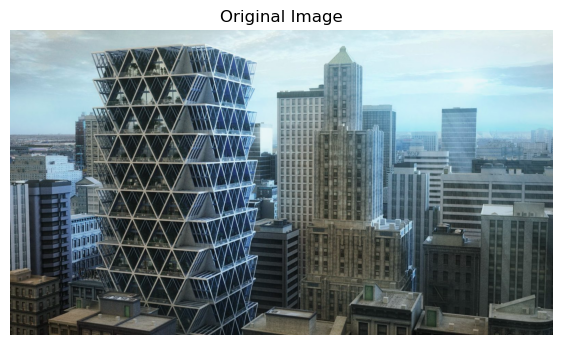

In [11]:
plt.figure(figsize=(7, 7))
plt.imshow(o_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

<a id="sobel-edge-detection_x"></a>
## ***Sobel X Edge Detection***

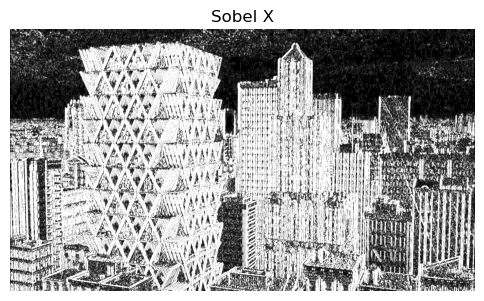

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.show()

<a id="sobel-edge-detection_y"></a>
## ***Sobel Y Edge Detection***

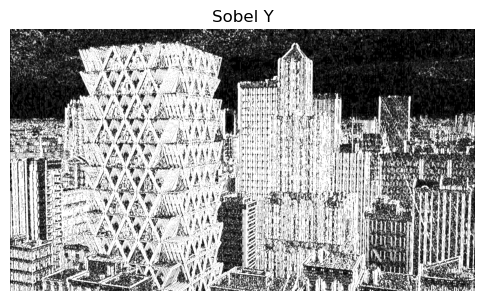

In [17]:
plt.figure(figsize=(6, 6))
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()

<a id="sobel-edge-detection"></a>
## ***Sobel Edge Detection***

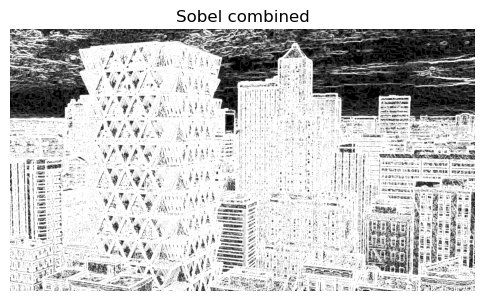

In [20]:
plt.figure(figsize=(6, 6))
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel combined')
plt.axis('off')
plt.show()

<a id="gaussinan"></a>
## ***Gaussian Blur***

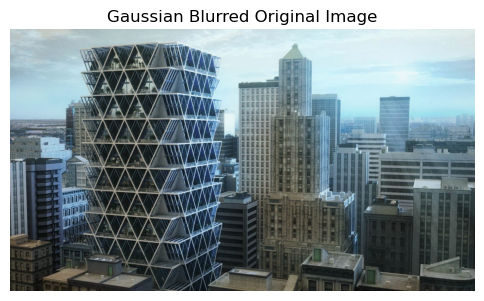

In [23]:
image = cv2.imread('edge1.jpg')

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Display the Gaussian Blurred image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Gaussian Blurred Original Image')
plt.axis('off')
plt.show()

<a id="gabor-filters"></a>
## ***Gabor Filter***


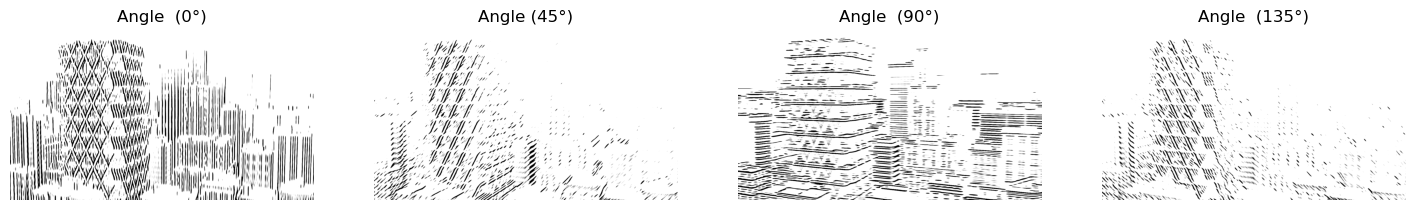

In [26]:

# Read the input image
image = cv2.imread('edge1.jpg', cv2.IMREAD_GRAYSCALE)

# Function to apply Gabor filter
def apply_gabor(image, ksize, sigma, theta, lamda, gamma, psi):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, psi, ktype=cv2.CV_64F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

# Parameters for Gabor filters
ksize = 31     # Size of the Gabor kernel
sigma = 4.0    # Standard deviation of the Gaussian envelope
lamda = 10.0   # Wavelength of the sinusoidal factor
gamma = 0.5    # Spatial aspect ratio
psi = 0        # Phase offset

# Apply Gabor filters at angles 0°, 45°, 90°, 135°
gabor_0 = apply_gabor(image, ksize, sigma, 0, lamda, gamma, psi)
gabor_45 = apply_gabor(image, ksize, sigma, np.pi / 4, lamda, gamma, psi)
gabor_90 = apply_gabor(image, ksize, sigma, np.pi / 2, lamda, gamma, psi)
gabor_135 = apply_gabor(image, ksize, sigma, 3 * np.pi / 4, lamda, gamma, psi)

# Display the Gabor filter responses
plt.figure(figsize=(18, 8))

# Gabor 0°
plt.subplot(1, 4, 1)
plt.imshow(gabor_0, cmap='gray')
plt.title('Angle  (0°)')
plt.axis('off')

# Gabor 45°
plt.subplot(1, 4, 2)
plt.imshow(gabor_45, cmap='gray')
plt.title('Angle (45°)')
plt.axis('off')

# Gabor 90°
plt.subplot(1, 4, 3)
plt.imshow(gabor_90, cmap='gray')
plt.title('Angle  (90°)')
plt.axis('off')

# Gabor 135°
plt.subplot(1, 4, 4)
plt.imshow(gabor_135, cmap='gray')
plt.title('Angle  (135°)')
plt.axis('off')

plt.show()


<a id="laplacian-edge-detection"></a>
## ***Laplacian Edge Detection***

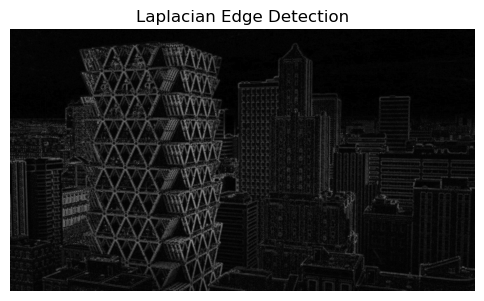

In [29]:
## Laplacian Edge Detection

# Apply Gaussian Blur to reduce noise (optional but recommended)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Convert the result to uint8 (optional, for better visualization)
laplacian = cv2.convertScaleAbs(laplacian)

# Display the Laplacian edges
plt.figure(figsize=(6, 6))
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

<a id="magnitude-spectrum"></a>
## ***Magnitude Spectrum Transformation***

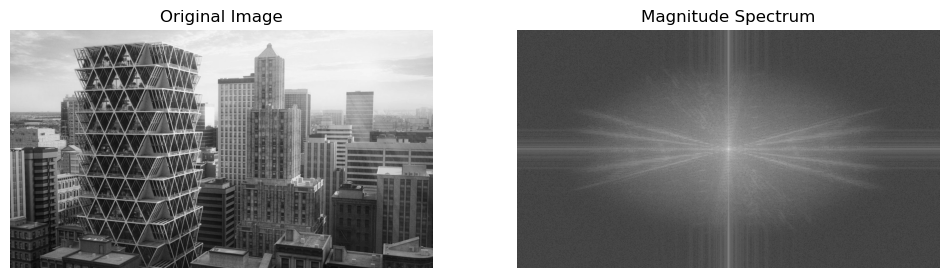

In [32]:
image = cv2.imread('edge1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise (optional)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform the Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(blurred), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()